### making images from video 


In [2]:
import cv2 

path='worker-zone-detection.mp4'
video=cv2.VideoCapture(path)

width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = video.get(cv2.CAP_PROP_FPS)
frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

print("Width:", width)
print("Height:", height)
print("FPS:", fps)
print("Frame count:", frame_count)


count=1
image_id=1

while True:
    retrn,frame=video.read()

    if retrn==True:

        if count%30==0:
            name=str(image_id)+'.jpg'
            image_id+=1

            cv2.imwrite(name,frame)
            
        count+=1
    
    else:
        break

print(image_id)



Width: 1920
Height: 1080
FPS: 59.94005994005994
Frame count: 4548
152


In [1]:
import os

for i in range(1,152):
    os.remove((str(i)+'.jpg'))

#### plot image


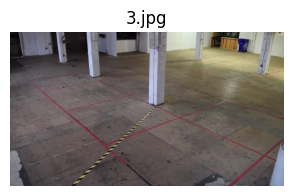

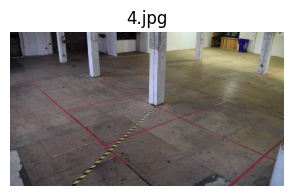

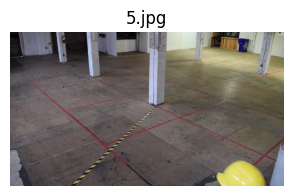

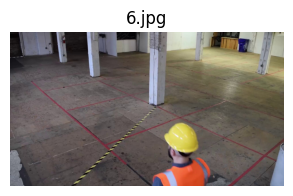

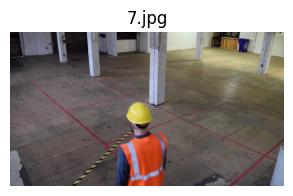

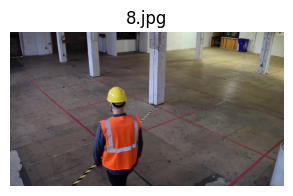

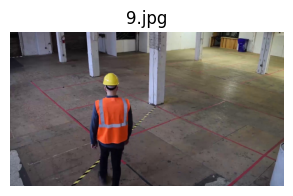

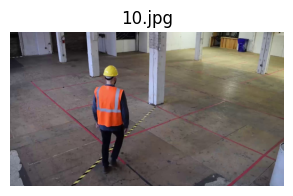

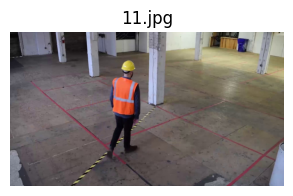

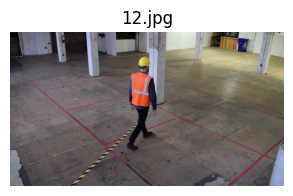

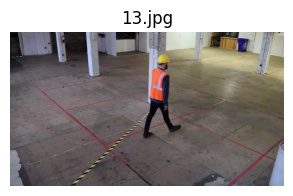

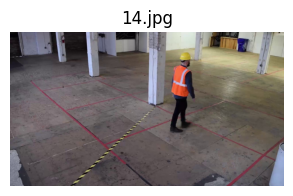

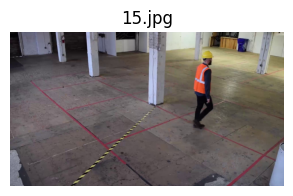

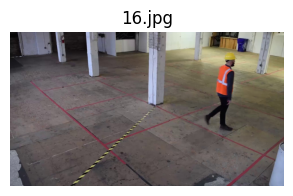

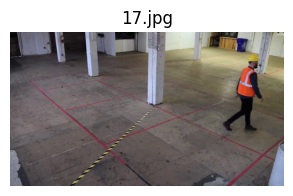

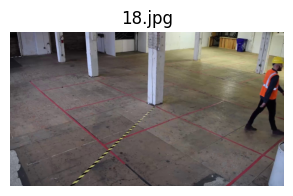

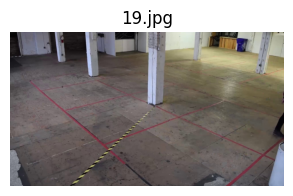

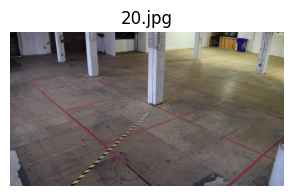

In [42]:
import matplotlib.pyplot as plt

for i in range(3, 21):
    plt.figure(figsize=(4, 2))
    img = cv2.imread(str(i) + '.jpg')
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(str(i) + '.jpg')
    plt.axis('off')
    plt.show()


#### image similarity

In [29]:
import numpy as np 

arr=np.array(cv2.cvtColor(cv2.imread('3.jpg'),cv2.COLOR_BGR2GRAY))
square_arr=np.square(arr)
square_arr

arr2=np.array(cv2.cvtColor(cv2.imread('4.jpg'),cv2.COLOR_BGR2GRAY))
square_arr2=np.square(arr2)
square_arr2

arr3=np.array(cv2.cvtColor(cv2.imread('9.jpg'),cv2.COLOR_BGR2GRAY))
square_arr3=np.square(arr3)
square_arr3
# t=square_arr-square_arr2
# t

array([[164, 113, 113, ..., 132,  73, 132],
       [228, 228, 228, ..., 132, 132, 132],
       [105, 105, 105, ..., 132,  73, 132],
       ...,
       [105, 105, 144, ..., 100, 100, 100],
       [ 68,  68, 105, ..., 100, 100, 100],
       [ 33,  68, 105, ..., 100, 100, 100]], dtype=uint8)

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

cs=cosine_similarity(arr,arr2)
df=pd.DataFrame(cs)
df
df.describe()
# df[df<0.6].count().count()
# sns.pairplot(df)
# plt.show()

0            1            2            3            4     \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.849049     0.848693     0.847572     0.846725     0.846890   
std       0.042377     0.042392     0.042603     0.042732     0.042666   
min       0.776956     0.776824     0.773971     0.772274     0.772138   
25%       0.824335     0.824044     0.823325     0.822858     0.823393   
50%       0.842694     0.841925     0.840101     0.838890     0.839038   
75%       0.857686     0.857304     0.856591     0.856239     0.856751   
max       0.998829     0.998775     0.998719     0.998726     0.998732   

              5            6            7            8            9     ...  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000  ...   
mean      0.846514     0.846317     0.846320     0.847838     0.850385  ...   
std       0.042771     0.042864     0.042892     0.042922     0.042717  ...   
min       0.771408     0.771180     0.771576     0.774531     0.778583  ...   
25%       0.822881     0.822448     0.822434     0.823900     0.826550  ...   
50%       0.838510     0.838201     0.838188     0.839985     0.842832  ...   
75%       0.856359     0.855939     0.855689     0.857065     0.858872  ...   
max       0.998672     0.998631     0.998546     0.998648     0.998804  ...   

              1070         1071         1072         1073         1074  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.919153     0.919040     0.918866     0.918769     0.918232   
std       0.045024     0.044999     0.045060     0.045220     0.045564   
min       0.780394     0.781743     0.782824     0.782740     0.781259   
25%       0.912131     0.911874     0.911400     0.911301     0.911196   
50%       0.934103     0.934037     0.934174     0.934353     0.934204   
75%       0.943291     0.943210     0.942989     0.942978     0.942649   
max       0.999415     0.999311     0.999312     0.999438     0.999309   

              1075         1076         1077         1078         1079  
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000  
mean      0.918359     0.918988     0.919154     0.918516     0.916888  
std       0.045710     0.045602     0.045742     0.046522     0.047145  
min       0.780260     0.780306     0.780151     0.778074     0.775347  
25%       0.911729     0.912932     0.913511     0.913661     0.911718  
50%       0.934549     0.935305     0.935751     0.935565     0.934393  
75%       0.942945     0.944082     0.944723     0.944504     0.943106  
max       0.999229     0.999193     0.999261     0.999262     0.998694  

[8 rows x 1080 columns]

In [30]:
import numpy as np
from skimage.metrics import structural_similarity as ssim

# 2. Structural Similarity Index (SSIM)
similarity, _ = ssim(arr, arr3, full=True)
print("SSIM:", similarity)


SSIM: 0.8404117321694534


2025-01-21 15:41:02.839944: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 92s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

None


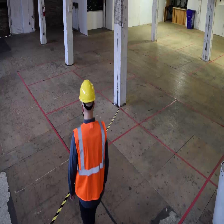

In [ ]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet')
print(model.summary())

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np


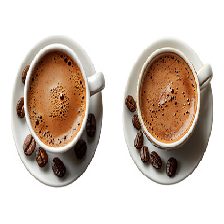

In [39]:

img_path ='object.jpg'

img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
display(img)

In [40]:
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

#mean centering with respect to Image
x = preprocess_input(x)
features = model.predict(x)
p = decode_predictions(features)
p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


[[('n03314780', 'face_powder', 0.4943575),
  ('n07920052', 'espresso', 0.21163449),
  ('n07930864', 'cup', 0.053643852),
  ('n04131690', 'saltshaker', 0.024021078),
  ('n02786058', 'Band_Aid', 0.02329149)]]

### try UFC 50 data set for action recognition

In [5]:
import os
import cv2
# import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

# from moviepy.editor import *

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

E0000 00:00:1737624288.171705    5596 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737624288.427760    5596 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [10]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [11]:
all_classes=os.listdir('UCF50')
all_classes

['RopeClimbing',
 'RockClimbingIndoor',
 'Punch',
 'Diving',
 'JumpingJack',
 'MilitaryParade',
 'Mixing',
 'HighJump',
 'Biking',
 'PoleVault']

RopeClimbing
v_RopeClimbing_g05_c17.avi
v_RopeClimbing_g15_c04.avi
v_RopeClimbing_g07_c03.avi
v_RopeClimbing_g01_c02.avi
v_RopeClimbing_g19_c04.avi
RockClimbingIndoor
v_RockClimbingIndoor_g22_c01.avi
v_RockClimbingIndoor_g22_c04.avi
v_RockClimbingIndoor_g08_c05.avi
v_RockClimbingIndoor_g19_c02.avi
v_RockClimbingIndoor_g21_c06.avi
Punch
v_Punch_g19_c02.avi
v_Punch_g12_c05.avi
v_Punch_g16_c03.avi
v_Punch_g21_c06.avi
v_Punch_g09_c07.avi
Diving
v_Diving_g09_c05.avi
v_Diving_g16_c01.avi
v_Diving_g06_c06.avi
v_Diving_g22_c06.avi
v_Diving_g18_c04.avi
JumpingJack
v_JumpingJack_g03_c01.avi
v_JumpingJack_g01_c05.avi
v_JumpingJack_g05_c01.avi
v_JumpingJack_g08_c03.avi
v_JumpingJack_g10_c06.avi
MilitaryParade
v_MilitaryParade_g16_c02.avi
v_MilitaryParade_g02_c01.avi
v_MilitaryParade_g22_c02.avi
v_MilitaryParade_g07_c04.avi
v_MilitaryParade_g18_c06.avi
Mixing
v_Mixing_g01_c07.avi
v_Mixing_g25_c01.avi
v_Mixing_g02_c01.avi
v_Mixing_g23_c02.avi
v_Mixing_g12_c01.avi
HighJump
v_HighJump_g07_c01.avi
v_Hi

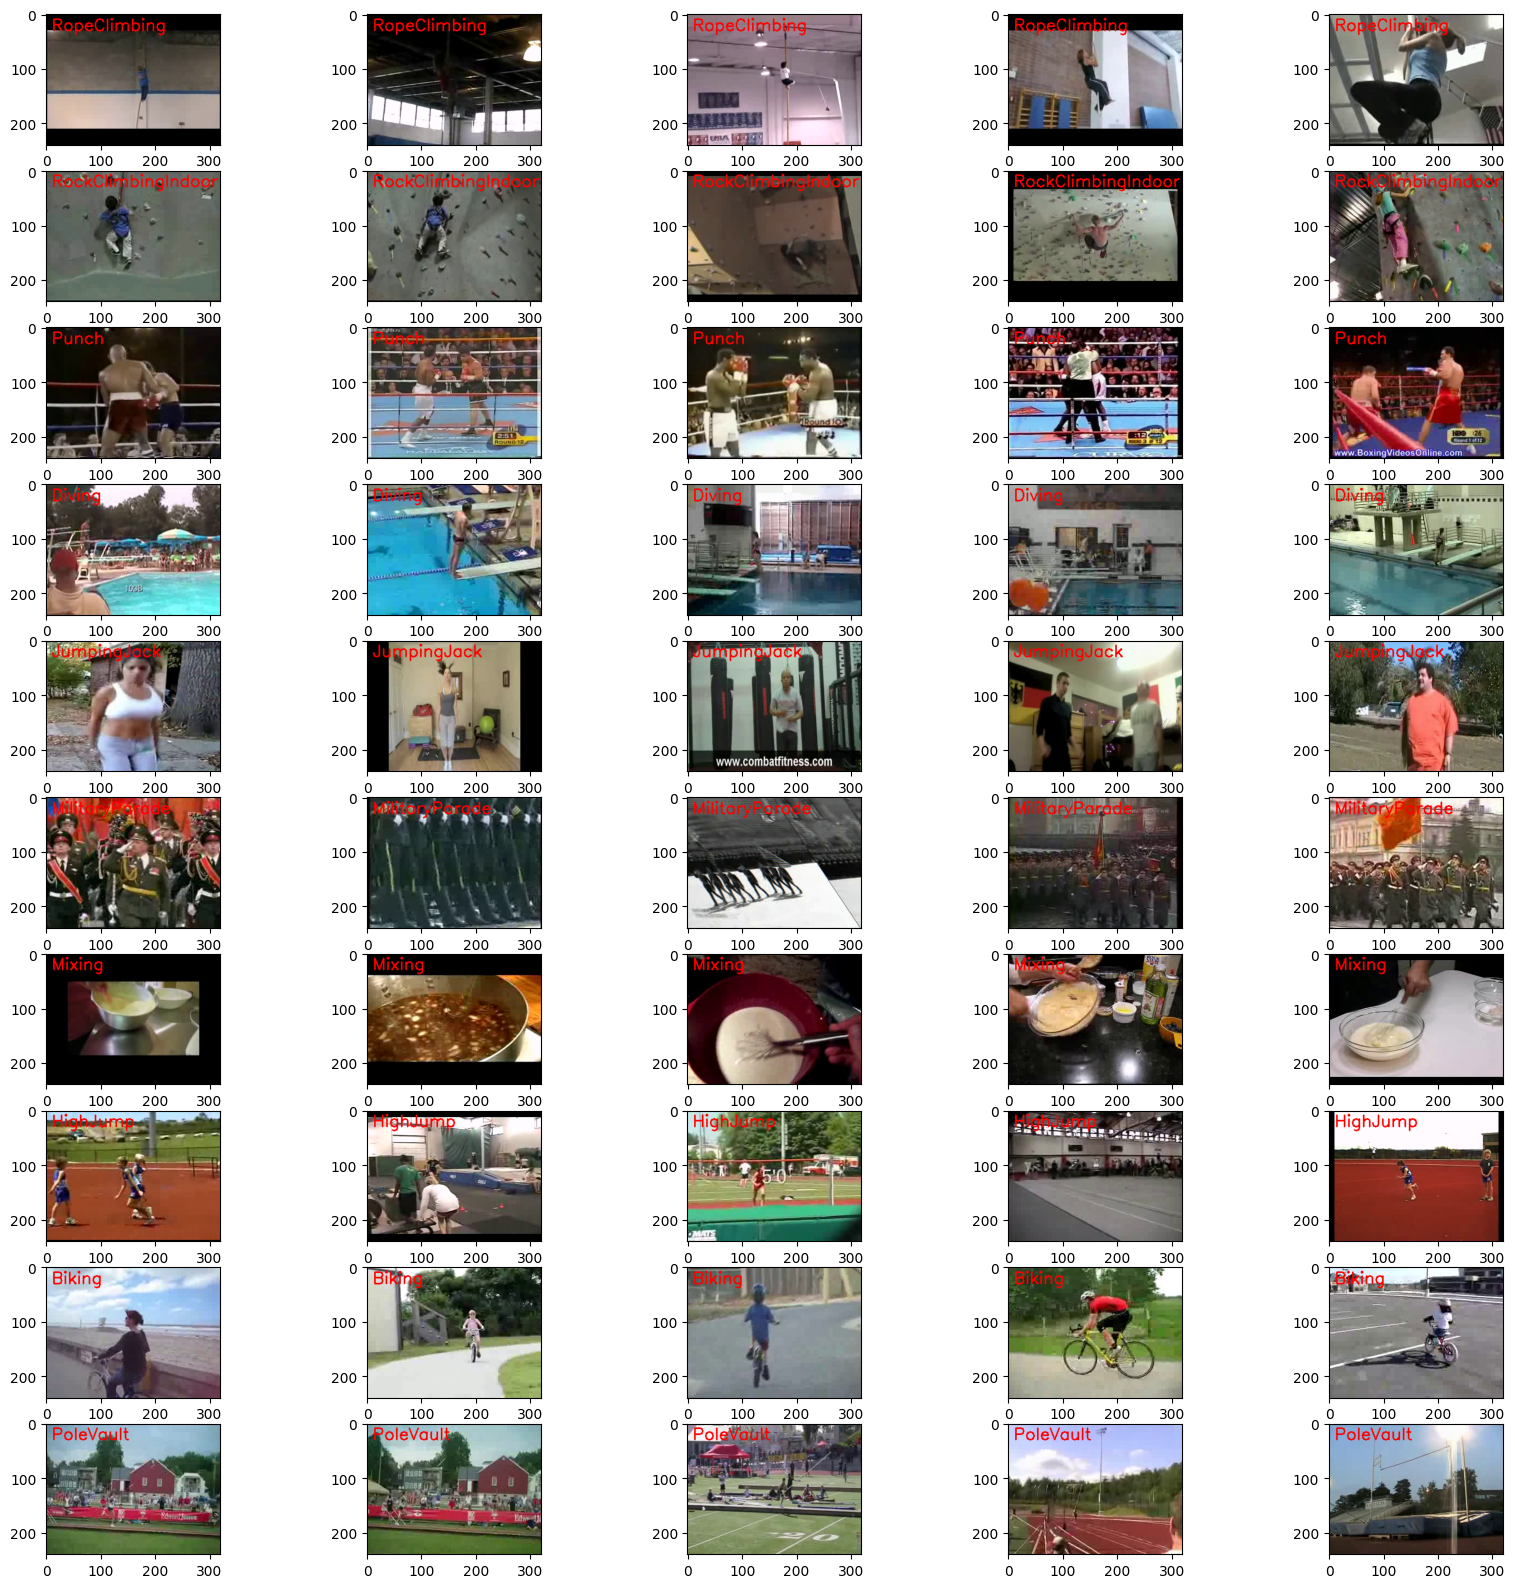

In [12]:
count=1
index=1
plt.figure(figsize=(20,20))
for class_name in all_classes:
    print(class_name)
    # print(len(os.listdir('UCF50/'+class_name)))
    for vid_name in os.listdir('UCF50/'+class_name):
        if count<=5:
            video=cv2.VideoCapture('UCF50/'+class_name+'/'+vid_name)
            _,frame=video.read()
            video.release()
            rgb_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
            print(vid_name)
            cv2.putText(rgb_frame,class_name,(10,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2)
            plt.subplot(10,5,index)
            index+=1
            plt.imshow(rgb_frame)
            count+=1
    count=1

In [13]:
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64
SEQUENCE_LENGTH = 20
DATASET_DIR = "UCF50"
CLASSES_LIST = ['RopeClimbing','RockClimbingIndoor','Punch','Diving','JumpingJack','MilitaryParade','Mixing','HighJump','Biking','PoleVault']

In [14]:
def frame_extraction(video_path):
    frames=[]
    video_read=cv2.VideoCapture(video_path)
    video_total_frames=int(video_read.get(cv2.CAP_PROP_FRAME_COUNT))
    # print(video_total_frames)
    skip_frame=max(int(video_total_frames/SEQUENCE_LENGTH), 1)

    for frame_counter in range(SEQUENCE_LENGTH):
        video_read.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frame)
        success, frame = video_read.read() 
        if not success:
            break

        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
       
        normalized_frame = resized_frame / 255
        frames.append(normalized_frame)
    
    video.release()
    return frames


In [12]:
print(frame_extraction('UCF50/JumpingJack/v_JumpingJack_g01_c05.avi'))

[array([[[  0.0039216,   0.0039216,   0.0039216],
        [  0.0039216,   0.0039216,   0.0039216],
        [  0.0039216,   0.0039216,   0.0039216],
        ...,
        [  0.0039216,   0.0039216,   0.0039216],
        [  0.0039216,   0.0039216,   0.0039216],
        [  0.0039216,   0.0039216,   0.0039216]],

       [[  0.0039216,   0.0039216,   0.0039216],
        [  0.0039216,   0.0039216,   0.0039216],
        [  0.0039216,   0.0039216,   0.0039216],
        ...,
        [  0.0039216,   0.0039216,   0.0039216],
        [  0.0039216,   0.0039216,   0.0039216],
        [  0.0039216,   0.0039216,   0.0039216]],

       [[          0,           0,           0],
        [          0,           0,           0],
        [          0,           0,           0],
        ...,
        [          0,           0,           0],
        [          0,           0,           0],
        [          0,           0,           0]],

       ...,

       [[          0,           0,           0],
        [ 

In [13]:
def create_dataset():

    features = []
    labels = []
    video_files_paths = []

    for class_index, class_name in enumerate(CLASSES_LIST):
        # print(class_name,class_index)
        files_list=os.listdir(os.path.join(DATASET_DIR,class_name))
        # print(files_list)
        for file_name in files_list:
            video_file_path=os.path.join(DATASET_DIR,class_name,file_name)
            # print(video_file_path)
            frames = frame_extraction(video_file_path)
            # print(len(frame))
            if len(frames) == SEQUENCE_LENGTH:

                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    return features,labels,video_files_paths

In [14]:
import pickle

with open('features.pkl', 'rb') as f:
    features = pickle.load(f)
# print(features)

with open('labels.pkl', 'rb') as f:
    labels = pickle.load(f)
# print(labels)

with open('video_files_paths.pkl', 'rb') as f:
    video_files_paths = pickle.load(f)
# print(video_files_paths)


In [15]:
# features, labels, video_files_paths = create_dataset()

In [16]:
one_hot_encoded_labels = to_categorical(labels)

In [17]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.25, shuffle = True, random_state = seed_constant)

In [18]:
from tensorflow.keras.layers import ConvLSTM2D,MaxPooling3D,TimeDistributed,Dropout,Flatten,Dense

def create_convlstm_model():
    model = Sequential()

    model.add(ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = 'tanh',data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True, input_shape = (SEQUENCE_LENGTH,
                                                                                      IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 8, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 14, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 16, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    #model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(Flatten()) 
    
    model.add(Dense(len(CLASSES_LIST), activation = "softmax"))
    
    model.summary()
    
    return model

In [19]:
model=create_convlstm_model()
model

2025-01-22 17:50:21.220866: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/ritik/Documents/vscode/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d (ConvLSTM2D)        │ (None, 20, 62, 62, 4)  │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 20, 31, 31, 4)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 20, 31, 31, 4)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_1 (ConvLSTM2D)      │ (None, 20, 29, 29, 8)  │         3,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 20, 15, 15, 8)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 20, 15, 15, 8)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_2 (ConvLSTM2D)      │ (None, 20, 13, 13, 14) │        11,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (None, 20, 7, 7, 14)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 20, 7, 7, 14)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_3 (ConvLSTM2D)      │ (None, 20, 5, 5, 16)   │        17,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_3 (MaxPooling3D)  │ (None, 20, 3, 3, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2880)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        28,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,810 (241.45 KB)

 Trainable params: 61,810 (241.45 KB)

 Non-trainable params: 0 (0.00 B)

<Sequential name=sequential_1, built=True>

In [20]:
plot_model(model, to_file = 'convlstm_model_structure_plot.png', show_shapes = True, show_layer_names = True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [ ]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

convlstm_model_training_history = model.fit(x = features_train, y = labels_train, epochs = 50, batch_size = 4,shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

model_evaluation_history = model.evaluate(features_test, labels_test)

In [27]:

def predict_on_video(video_file_path, output_file_path, SEQUENCE_LENGTH):
    video_reader = cv2.VideoCapture(video_file_path)

    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 
                                   video_reader.get(cv2.CAP_PROP_FPS), (original_video_width, original_video_height))

    frames_queue = deque(maxlen = SEQUENCE_LENGTH)
    predicted_class_name = ''

    while video_reader.isOpened():
        ok, frame = video_reader.read() 
        if not ok:
            break

        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))        
        normalized_frame = resized_frame / 255
        frames_queue.append(normalized_frame)

        if len(frames_queue) == SEQUENCE_LENGTH:
            predicted_labels_probabilities = model.predict(np.expand_dims(frames_queue, axis = 0))[0]
            predicted_label = np.argmax(predicted_labels_probabilities)
            predicted_class_name = CLASSES_LIST[predicted_label]
        cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        video_writer.write(frame)
        
    video_reader.release()
    video_writer.release()